In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Logistic Regression/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Logistic Regression/Social_Network_Ads.csv


## Logistic Regression Basics

In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Create the dataframe

df = pd.read_csv(r'DataSets/Logistic Regression/Social_Network_Ads.csv')
df = df.set_index('User ID') # Set ID number as index
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [4]:
# Get dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [5]:
# Get summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.00,37.66,10.48,18.00,29.75,37.00,46.00,60.00
EstimatedSalary,400.00,69742.50,34096.96,15000.00,43000.00,70000.00,88000.00,150000.00
Purchased,400.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00


In [6]:
# Show Pearson correlation matrix

df.corr()

,Age,EstimatedSalary,Purchased
Age,1.00,0.16,0.62
EstimatedSalary,0.16,1.00,0.36
Purchased,0.62,0.36,1.00


In [7]:
# Show value counts for sex attribute

df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [8]:
# Check the crosstab for Gender and Purchased, get odds ratio

tab = pd.crosstab(df['Gender'],df['Purchased']).values
a = tab[0,1]
b = tab[0,0]
c = tab[1,1]
d = tab[1,0]
OR_gender = a*d / (b*c)
print('Odds Ratio: ',OR_gender,'\n')
print(pd.crosstab(df['Gender'],df['Purchased']))

Odds Ratio:  1.194225721784777 

Purchased    0   1
Gender            
Female     127  77
Male       130  66


In [9]:
# Make the gender column into a categorical variable (1 : Female, 0: Male)

df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [10]:
# Scale the salary data to make it more interpretable ($ Salary x 10000)

df['EstimatedSalary'] = df['EstimatedSalary'] / 10000

In [11]:
# Create a statsmodel logistic regression table

model = smf.logit(formula='Purchased ~ Gender + Age + EstimatedSalary', data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 21 May 2023   Pseudo R-squ.:                  0.4711
Time:                        12:11:46   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4498      1.309     -9.510      0.000     -15.016      -9.884
Gender        

In [12]:
# Split data into independent and dependent variables

X = df.drop(columns='Purchased')
y = df['Purchased']

In [13]:
# Create the training and testing data for modelling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [14]:
# Fit different models and compare

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models.head()

100%|██████████| 29/29 [00:02<00:00, 10.88it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.94,0.93,0.93,0.94,0.03
KNeighborsClassifier,0.93,0.93,0.93,0.93,0.03
NuSVC,0.93,0.92,0.92,0.92,0.02
BaggingClassifier,0.92,0.91,0.91,0.92,0.12
QuadraticDiscriminantAnalysis,0.92,0.91,0.91,0.92,0.03


In [15]:
# Use best model

mod = SVC(kernel='linear').fit(X_train,y_train)

In [16]:
# Get classification results

print('Confusion Matrix: ')
print(confusion_matrix(y_test, mod.predict(X_test)) , '\n')
print('Classification Results: ')
print(classification_report(y_test, mod.predict(X_test)))

Confusion Matrix: 
[[120   5]
 [ 28  47]] 

Classification Results: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       125
           1       0.90      0.63      0.74        75

    accuracy                           0.83       200
   macro avg       0.86      0.79      0.81       200
weighted avg       0.85      0.83      0.83       200



In [17]:
# Create a dataframe for the model

feature = ['Gender', 'Age', 'EstimatedSalary']
domain = ['{0,1}','[0,inf)', '[0,inf)']
print('Model: SVC')
print('Target: Purchased')
print('R-Squared: ', mod.score(X_test, y_test))
print('Bias (β0): ', mod.intercept_[0])
print('Parameter: ', mod.get_params(),'\n')
model_df = pd.DataFrame()
model_df['Index (i)'] = list(range(1,4))
model_df['Feature'] = feature
model_df['Domain (Xi)'] = domain
model_df['Coefficent (βi)'] = mod.coef_[0]
model_df = model_df.set_index('Index (i)')
#model_df['Odds Ratio (OR)'] = np.exp(model_df['Coefficent (βi)'])
print(model_df)

Model: SVC
Target: Purchased
R-Squared:  0.835
Bias (β0):  -8.804055245157773
Parameter:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

                   Feature Domain (Xi)  Coefficent (βi)
Index (i)                                              
1                   Gender       {0,1}            -0.06
2                      Age     [0,inf)             0.16
3          EstimatedSalary     [0,inf)             0.28


### Data Visualization

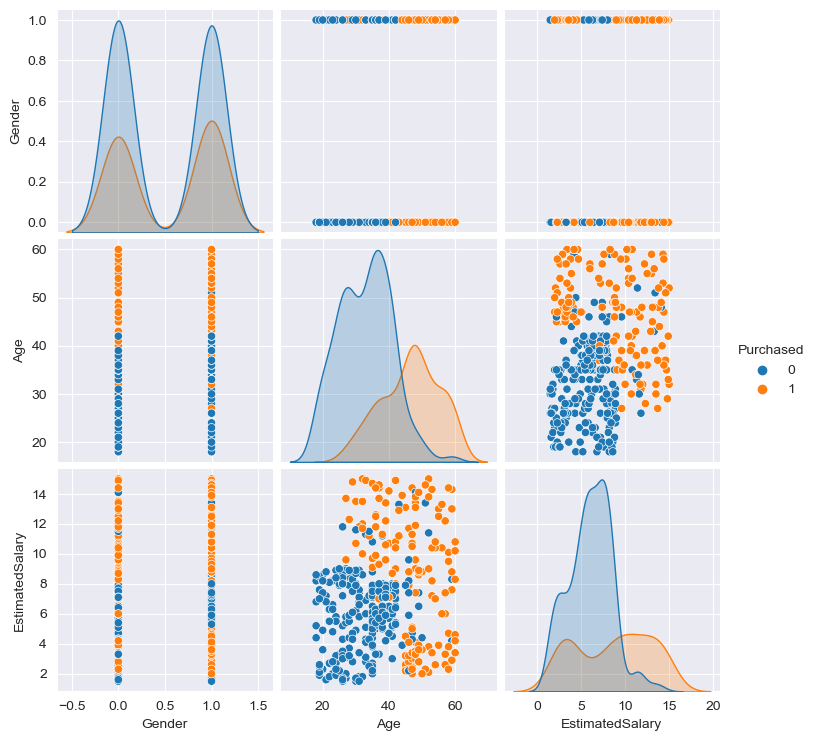

In [18]:
sns.pairplot(df, hue='Purchased')

### Conclusion and Interpretation:

1. The support vector classifier (SVC) performed the best with an R-Squared score of 0.94 (unadjusted) and 0.93 (adjusted)
2. The binary variable (Gender) was defined as {1 : Female, 0 : Male} so a female has a log-odds of purchasing decreases by 0.06 (compared to males).
3. For every 1 year increase in age than the odds ratio (log-scale) increases by 0.16.
4. For every $ 10,000 increase in estimated salary, the log-odds of purchase increases by 0.28.